In [22]:
# Gap Up Identifier - Jupyter Notebook
import pandas as pd
pd.set_option('display.width', 160)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [23]:
def load_and_analyze_data(csv_file, gap_threshold):
    """Load CSV and identify gap ups"""

    df = pd.read_csv(csv_file)
    
    df.columns = df.columns.str.lower()
    required_cols = ['open', 'close']

    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"CSV must contain 'open' and 'close' columns. Found: {list(df.columns)}")
    
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
    else:
        df['date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')
    
    df['prev_close'] = df['close'].shift(1)
    df['gap_pct'] = ((df['open'] - df['prev_close']) / df['prev_close']) * 100
    df['is_gap_up'] = df['gap_pct'] >= gap_threshold
    
    return df

In [24]:
def plot_gap_ups(df, gap_threshold):
    """Create visualization showing price data with gap ups highlighted"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})
    
    ax1.plot(df['date'], df['close'], label='Close Price', color='blue', linewidth=1.5)
    ax1.plot(df['date'], df['open'], label='Open Price', color='green', linewidth=1, alpha=0.7)
    
    gap_up_days = df[df['is_gap_up'] == True]
    if len(gap_up_days) > 0:
        ax1.scatter(gap_up_days['date'], gap_up_days['open'], 
                   color='red', s=100, marker='^', label=f'Gap Up (≥{gap_threshold}%)', 
                   zorder=5, edgecolors='darkred', linewidths=2)
        
        for date in gap_up_days['date']:
            ax1.axvline(x=date, color='red', linestyle='--', alpha=0.3, linewidth=1)
    
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Price', fontsize=12)
    ax1.set_title('Price Chart with Gap Ups Highlighted', fontsize=14, fontweight='bold')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    colors = ['red' if gap else 'gray' for gap in df['is_gap_up']]
    ax2.bar(df['date'], df['gap_pct'], color=colors, alpha=0.6, width=0.8)
    ax2.axhline(y=gap_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold ({gap_threshold}%)')
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Gap %', fontsize=12)
    ax2.set_title('Daily Gap Percentage', fontsize=14, fontweight='bold')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3, axis='y')
    
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # plt.tight_layout()
    plt.show()


In [25]:
# csv_file = 'ES(649180695)_historical_data.csv'
csv_file = 'ES(495512563)(1 hour)_historical_data.csv'

gap_threshold = 1.35
df = load_and_analyze_data(csv_file, gap_threshold)


print(f"Data loaded successfully: {len(df)} rows")
print(f"\nFirst few rows:")
print(df.head())

Data loaded successfully: 1539 rows

First few rows:
                 date    open    high     low   close  volume  prev_close  gap_pct  is_gap_up
0 2024-12-18 11:00:00  6315.0  6315.0  6315.0  6315.0      10         NaN      NaN      False
1 2024-12-18 12:00:00  6315.0  6315.0  6315.0  6315.0       0      6315.0      0.0      False
2 2024-12-18 13:00:00  6315.0  6315.0  6315.0  6315.0       0      6315.0      0.0      False
3 2024-12-18 14:00:00  6315.0  6315.0  6315.0  6315.0       0      6315.0      0.0      False
4 2024-12-18 15:00:00  6315.0  6315.0  6315.0  6315.0       0      6315.0      0.0      False


In [26]:
gap_ups = df[df['is_gap_up'] == True].copy()

print(gap_ups)

                    date     open     high      low    close  volume  prev_close   gap_pct  is_gap_up
18   2025-01-21 11:00:00  6252.50  6252.50  6252.50  6252.50       1     6164.00  1.435756       True
107  2025-03-17 12:00:00  5820.00  5820.00  5820.00  5820.00       1     5702.50  2.060500       True
159  2025-04-01 12:00:00  5758.00  5758.00  5758.00  5758.00       1     5662.75  1.682045       True
187  2025-04-07 09:00:00  5089.00  5315.00  5081.75  5212.50      12     5016.50  1.445231       True
190  2025-04-07 12:00:00  5207.50  5207.50  5207.50  5207.50       1     5082.75  2.454380       True
194  2025-04-08 08:30:00  5346.50  5346.50  5346.50  5346.50       1     5205.00  2.718540       True
205  2025-04-09 11:00:00  5132.75  5132.75  5132.75  5132.75       1     5060.00  1.437747       True
216  2025-04-10 14:00:00  5432.75  5432.75  5432.75  5432.75       1     5329.25  1.942112       True
260  2025-04-22 08:30:00  5325.00  5345.00  5325.00  5340.00       5     5215.00  


Found 12 gap up(s) of 1.35% or more:

               date  gap_pct    open  prev_close     low    high   close
2025-01-21 11:00:00 1.435756 6252.50     6164.00 6252.50 6252.50 6252.50
2025-03-17 12:00:00 2.060500 5820.00     5702.50 5820.00 5820.00 5820.00
2025-04-01 12:00:00 1.682045 5758.00     5662.75 5758.00 5758.00 5758.00
2025-04-07 09:00:00 1.445231 5089.00     5016.50 5081.75 5315.00 5212.50
2025-04-07 12:00:00 2.454380 5207.50     5082.75 5207.50 5207.50 5207.50
2025-04-08 08:30:00 2.718540 5346.50     5205.00 5346.50 5346.50 5346.50
2025-04-09 11:00:00 1.437747 5132.75     5060.00 5132.75 5132.75 5132.75
2025-04-10 14:00:00 1.942112 5432.75     5329.25 5432.75 5432.75 5432.75
2025-04-22 08:30:00 2.109300 5325.00     5215.00 5325.00 5345.00 5340.00
2025-04-23 08:30:00 2.558398 5532.00     5394.00 5532.00 5567.50 5555.50
2025-05-12 08:30:00 2.553560 5923.75     5776.25 5923.75 5929.25 5929.25
2025-10-13 08:30:00 1.804792 6670.25     6552.00 6661.75 6694.75 6693.25

Summary Sta

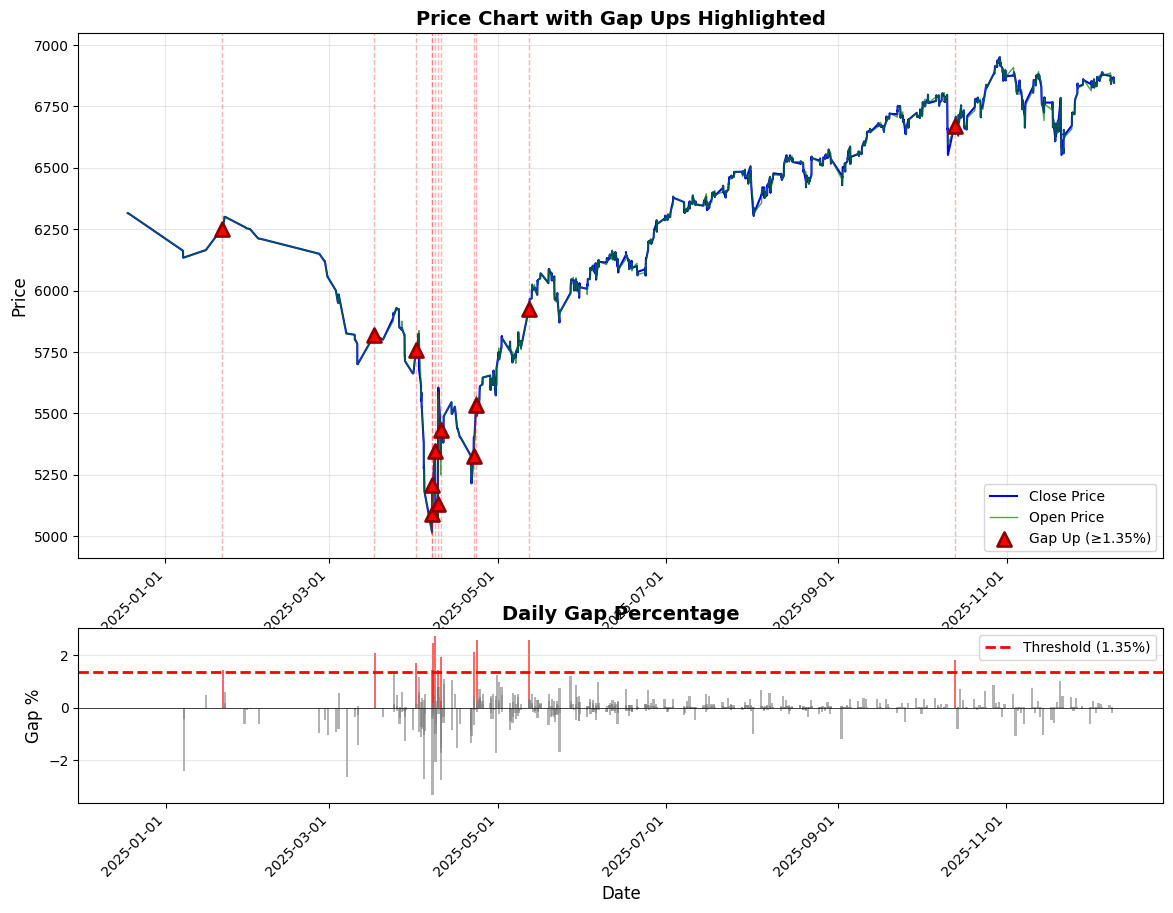


Gap up results saved to: ES(495512563)(1 hour)_historical_data_gap_ups.csv


In [27]:

if len(gap_ups) > 0:
    print(f"\n{'='*80}")
    print(f"Found {len(gap_ups)} gap up(s) of {gap_threshold}% or more:")
    print(f"{'='*80}\n")
    
    display_cols = ['date', 'gap_pct', 'open', 'prev_close', 'close']
    for col in ['high', 'low']:
        if col in df.columns:
            display_cols.insert(4, col)
    
    print(gap_ups[display_cols].to_string(index=False))
    
    print(f"\n{'='*80}")
    print(f"Summary Statistics:")
    print(f"{'='*80}")
    print(f"Total trading days: {len(df) - 1}")
    print(f"Gap ups found: {len(gap_ups)}")
    print(f"Average gap: {gap_ups['gap_pct'].mean():.2f}%")
    print(f"Maximum gap: {gap_ups['gap_pct'].max():.2f}%")
    print(f"Minimum gap: {gap_ups['gap_pct'].min():.2f}%")
else:
    print(f"\nNo gap ups of {gap_threshold}% or more found.")


plot_gap_ups(df, gap_threshold)


output_file = csv_file.replace('.csv', '_gap_ups.csv')
if len(gap_ups) > 0:
    gap_ups.to_csv(output_file, index=False)
    print(f"\nGap up results saved to: {output_file}")